In [53]:
import getpass
import nibabel as nib
from pathlib import Path
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import random
import shutil
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import transforms
from matplotlib import colors
import matplotlib.patches as mpatches
import ast

In [2]:
user = getpass.getuser()

src = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT_Annotation_Summer2023/Completed"

paths = list(Path(src).glob('*.csv'))

In [3]:
rating_resultsdict = {}

for path in paths:
    df = pd.read_csv(path, converters={"result": ast.literal_eval})

    ratings_df = df[df["type"] == "Rating"]

    for res in ratings_df["result"]:
        
        subject_id = res[0][:4]

        if subject_id in rating_resultsdict:
            rating_resultsdict[subject_id].append(res)
        else:
            rating_resultsdict[subject_id] = [res]

for v in rating_resultsdict.values():
    v.sort(key=lambda x: x[0])

In [49]:
original_file_path = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT/Nifti/"
included_files_path = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT_Annotation_Summer2023/all_nifti"
segmentation_path = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT/Segmentations/"

#Max slices in any lung is 64. 77 * 2 = 154.
grid = np.full((64,154), -1)


max_slice_amount = 0
for subject_id in tqdm(rating_resultsdict.keys()):
    left_lung = Path(included_files_path).glob(subject_id + "*L*.nii")
    left_names = [os.path.basename(path) for path in left_lung]
    left_names.sort()
    index_in_grid = (int(subject_id[2:]) - 1) * 2
    for result in rating_resultsdict[subject_id]:

        if "_R_" in result[0]:
            continue

        grid[left_names.index(result[0]), index_in_grid] = result[1]

    right_lung = Path(included_files_path).glob(subject_id + "*R*.nii")
    right_names = [os.path.basename(path) for path in right_lung]
    right_names.sort()
    index_in_grid = (int(subject_id[2:]) - 1) * 2 + 1
    for result in rating_resultsdict[subject_id]:

        if "_L_" in result[0]:
            continue

        grid[right_names.index(result[0]), index_in_grid] = result[1]

100%|██████████| 77/77 [00:18<00:00,  4.24it/s]


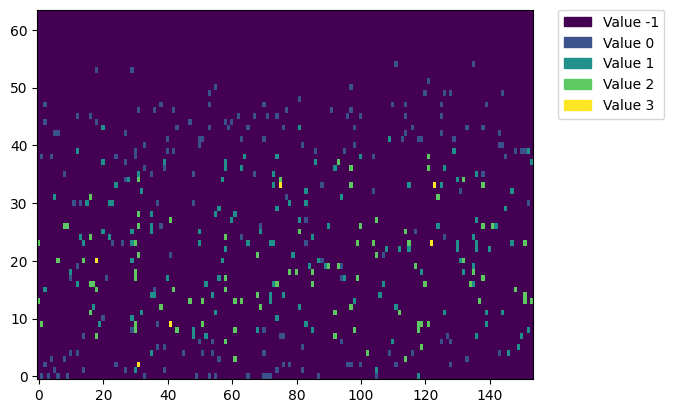

In [67]:
#cmap = colors.ListedColormap(["white", "yellow", "black", "blue", "red"])

values = np.unique(grid.ravel())

im = plt.imshow(grid, origin="lower", aspect="auto")#, cmap=cmap)

colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Value {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()
